In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2414515380977517745
 xla_global_id: -1]

In [78]:
from tensorflow.python.client import device_lib

def get_available_gpus():

    local_device_protos = device_lib.list_local_devices()

    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

[]

In [79]:
import tensorflow as tf

print(tf.test.is_built_with_cuda())

print(tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [80]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3681853215288019513
xla_global_id: -1
]


## O X 손글씨 분류
- 손으로 직접 그려서 사진으로 만들기 번거로워서 그림판으로 수작업....

In [3]:
from glob import glob

train_raw_0_list = glob('./data/OX_images/train_raw/o/*')
train_raw_0_list[:3]

['./data/OX_images/train_raw/o\\o1.png',
 './data/OX_images/train_raw/o\\o2.png',
 './data/OX_images/train_raw/o\\o3.png']

In [5]:
#!pip install scikit-image

In [6]:
from skimage.transform import rescale, resize
from skimage import color
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

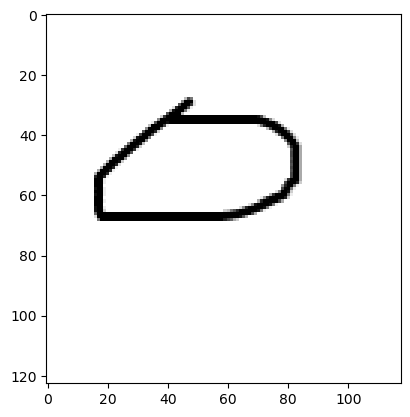

In [8]:
image = imread(train_raw_0_list[0])
image = color.rgb2gray(image)
plt.imshow(image, cmap='gray');

(28, 28)


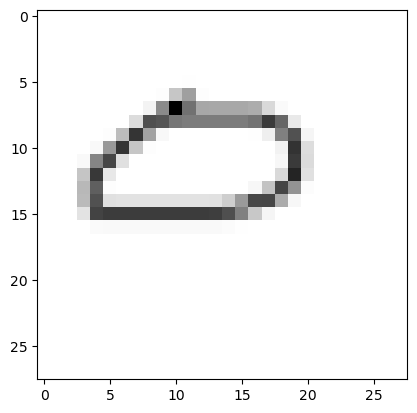

In [9]:
img_resized = resize(image, (28,28))
print(img_resized.shape)
plt.imshow(img_resized, cmap='gray');

In [28]:
import numpy as np

# 0 ~ 1 사이로 되있는 픽셀값을 다시 255로 복원시켜주는 작업?
imsave('./data/OX_images/train_raw/tmp.png', np.round(img_resized*255).astype(np.uint8))

In [29]:
train_raw_0_list[0].split('/')[-1][-6:-4]

'o1'

In [30]:
def img_resize(img):
    img = color.rgb2gray(img)
    return resize(img, (28,28))

In [31]:
from tqdm.notebook import tqdm

def conver_train_o():
    train_raw_0_list = glob('./data/OX_images/train_raw/o/*')
    for each in tqdm(train_raw_0_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX_images/train/o/' + each.split('/')[-1][-6:-4] + '.png'
        imsave(save_name , np.round(img_resized*255).astype(np.uint8))
        
conver_train_o()

  0%|          | 0/7 [00:00<?, ?it/s]

In [32]:
def conver_train_x():
    train_raw_x_list = glob('./data/OX_images/train_raw/x/*')
    for each in tqdm(train_raw_x_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX_images/train/x/' + each.split('/')[-1][-6:-4] + '.png'
        imsave(save_name , np.round(img_resized*255).astype(np.uint8))
        
conver_train_x()

  0%|          | 0/7 [00:00<?, ?it/s]

In [33]:
def conver_test_o():
    test_raw_0_list = glob('./data/OX_images/test_raw/o/*')
    for each in tqdm(test_raw_0_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX_images/test/o/' + each.split('/')[-1][-6:-4] + '.png'
        imsave(save_name , np.round(img_resized*255).astype(np.uint8))
        
conver_test_o()

  0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
def conver_test_x():
    test_raw_x_list = glob('./data/OX_images/test_raw/x/*')
    for each in tqdm(test_raw_x_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX_images/test/x/' + each.split('/')[-1][-6:-4] + '.png'
        imsave(save_name , np.round(img_resized*255).astype(np.uint8))
        
conver_test_x()

  0%|          | 0/3 [00:00<?, ?it/s]

In [58]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(13)
batch_size = 3

In [59]:
train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    './data/OX_images/train',
    target_size=(28,28),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 14 images belonging to 2 classes.


In [60]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    './data/OX_images/test',
    target_size=(28,28),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6 images belonging to 2 classes.


In [61]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
hist = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator.filepaths)//batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=len(test_generator.filepaths)//batch_size
)

Epoch 1/50
4/4 [==============================] - 1s 118ms/step - loss: 2.5818 - accuracy: 0.5455 - val_loss: 0.7220 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 75ms/step - loss: 0.6796 - accuracy: 0.5455 - val_loss: 0.7130 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 71ms/step - loss: 0.7140 - accuracy: 0.4167 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 71ms/step - loss: 0.6518 - accuracy: 0.6364 - val_loss: 0.6636 - val_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 0s 78ms/step - loss: 0.5085 - accuracy: 0.8182 - val_loss: 0.6099 - val_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 79ms/step - loss: 0.5903 - accuracy: 0.6364 - val_loss: 0.5938 - val_accuracy: 0.8333
Epoch 7/50
4/4 [==============================] - 0s 71ms/step - loss: 0.2684 - accuracy: 0.9091 - val_loss: 0.5476 - val_accuracy: 0.6667
Epoch 8/50
4/4 [==========

1/1 [==============================] - 0s 58ms/step


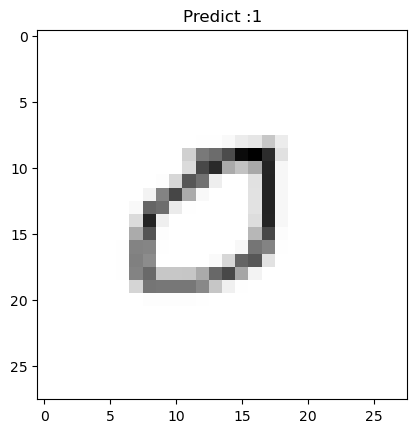

1/1 [==============================] - 0s 23ms/step


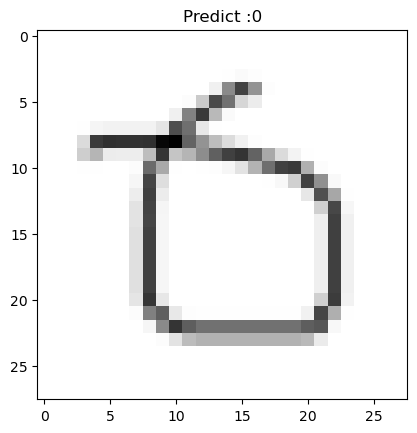

1/1 [==============================] - 0s 8ms/step


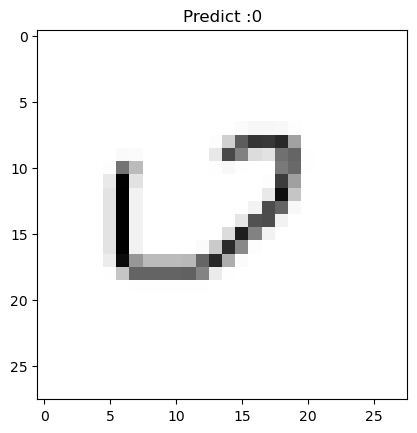

1/1 [==============================] - 0s 21ms/step


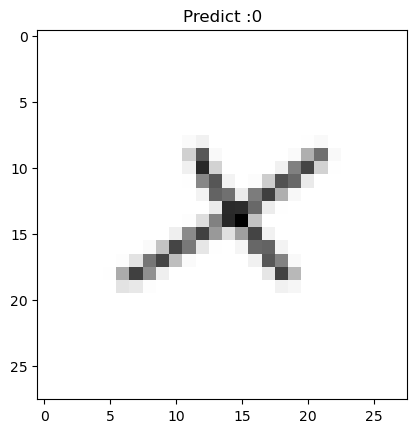

1/1 [==============================] - 0s 24ms/step


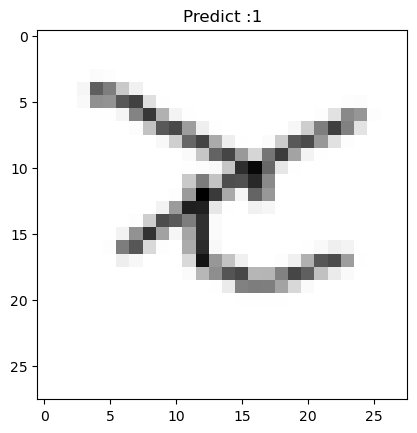

1/1 [==============================] - 0s 22ms/step


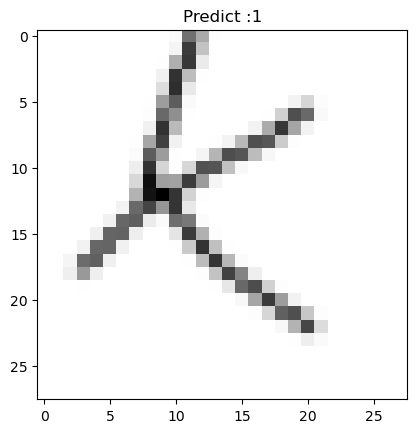

In [64]:
def show_prediction_result(n):
    img = imread(test_generator.filepaths[n])
    pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
    title = 'Predict :' + str(np.argmax(pred))
    plt.imshow(img/255.0, cmap='gray')
    plt.title(title)
    plt.show();

for n in range(len(test_generator.filepaths)):
    show_prediction_result(n)

데이터가 적어서 예측이 잘 안되는 것 같다. 다음에 시간이 되면 데이터를 늘려서 해보자